In [2]:
import pandas as pd
import geopandas as gdp
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
outages = gdp.read_file('../data/outages/unplanned-outages.geojson')

outages.head()

,incident_duration,exceptional_event_id,network_type,customer_affected,direct_cause_category,direct_cause,district_code,district_name,incident_date_time,restoration_date_time,...,main_equipment_involved_2,main_equipment_involved_3,main_equipment_involved_4,main_equipment_involved_5,main_equipment_involved_6,primary_substation,incident_reference_number,voltage,total_customer_minutes_lost,geometry
0,1976,None,HV,4.0,Unclassified or Unknown,Cause Unknown,41,Preston,2019-09-10 16:51:00+00:00,2019/09/12 02:47:00+01,...,"Indoor, Kiosk, Underground S/S, Pit or Chamber",Transformer (excluding 5),No lightning protection,None,None,400399,100117,6.6,1420,POINT (-2.65839 53.79097)
1,101,None,HV,28.0,Unclassified or Unknown,Transient Fault - No Repair,41,Preston,2019-09-18 19:21:00+00:00,2019/09/18 22:02:00+01,...,Above 25Al/16Cu and up to 50Al/32Cu,Aluminium,Single Circuit - Horizontal,None,None,400225,100120,11,2828,POINT (-2.62659 53.64815)
2,3,None,HV,667.0,Companies,Interruption to remove local generator or rest...,41,Preston,2019-09-19 01:46:00+00:00,2019/09/19 02:49:00+01,...,Mixed or unclassified,None,None,None,None,400413,100123,6.6,2001,POINT (-2.72402 53.77329)
3,85,None,HV,2.0,Unclassified or Unknown,Cause Unknown,41,Preston,2019-09-20 15:25:00+00:00,2019/09/20 17:50:00+01,...,Above 25Al/16Cu and up to 50Al/32Cu,Copper Cadmium,Single Circuit - Horizontal,None,None,400101,100124,6.6,170,POINT (-2.99573 53.74652)
4,76,None,HV,1.0,Unclassified or Unknown,Transient Fault - No Repair,41,Preston,2019-09-20 21:43:00+00:00,2019/09/20 23:59:00+01,...,Above 25Al/16Cu and up to 50Al/32Cu,Aluminium,Single Circuit - Horizontal,None,None,400219,100125,11,76,POINT (-2.71868 53.68913)


In [4]:
outages.columns

Index(['incident_duration', 'exceptional_event_id', 'network_type',
       'customer_affected', 'direct_cause_category', 'direct_cause',
       'district_code', 'district_name', 'incident_date_time',
       'restoration_date_time', 'exceptional_event_enddate',
       'exceptional_event_start_date', 'incident_reporting_year',
       'main_equipment_involved_1', 'main_equipment_involved_2',
       'main_equipment_involved_3', 'main_equipment_involved_4',
       'main_equipment_involved_5', 'main_equipment_involved_6',
       'primary_substation', 'incident_reference_number', 'voltage',
       'total_customer_minutes_lost', 'geometry'],
      dtype='object')

In [5]:
outages = outages.drop(columns=['district_code', 'main_equipment_involved_2', 'main_equipment_involved_3',
                                                 'main_equipment_involved_4', 'main_equipment_involved_5', 'main_equipment_involved_6', 'incident_reference_number'])
outages.head()

,incident_duration,exceptional_event_id,network_type,customer_affected,direct_cause_category,direct_cause,district_name,incident_date_time,restoration_date_time,exceptional_event_enddate,exceptional_event_start_date,incident_reporting_year,main_equipment_involved_1,primary_substation,voltage,total_customer_minutes_lost,geometry
0,1976,None,HV,4.0,Unclassified or Unknown,Cause Unknown,Preston,2019-09-10 16:51:00+00:00,2019/09/12 02:47:00+01,None,NaT,2019,"POWER TRANSFORMERS, REACTORS ETC.",400399,6.6,1420,POINT (-2.65839 53.79097)
1,101,None,HV,28.0,Unclassified or Unknown,Transient Fault - No Repair,Preston,2019-09-18 19:21:00+00:00,2019/09/18 22:02:00+01,None,NaT,2019,OVERHEAD LINES,400225,11,2828,POINT (-2.62659 53.64815)
2,3,None,HV,667.0,Companies,Interruption to remove local generator or rest...,Preston,2019-09-19 01:46:00+00:00,2019/09/19 02:49:00+01,None,NaT,2019,MISCELLANEOUS EQUIPMENT,400413,6.6,2001,POINT (-2.72402 53.77329)
3,85,None,HV,2.0,Unclassified or Unknown,Cause Unknown,Preston,2019-09-20 15:25:00+00:00,2019/09/20 17:50:00+01,None,NaT,2019,OVERHEAD LINES,400101,6.6,170,POINT (-2.99573 53.74652)
4,76,None,HV,1.0,Unclassified or Unknown,Transient Fault - No Repair,Preston,2019-09-20 21:43:00+00:00,2019/09/20 23:59:00+01,None,NaT,2019,OVERHEAD LINES,400219,11,76,POINT (-2.71868 53.68913)


In [6]:
outages['direct_cause_category'].unique()

array(['Unclassified or Unknown', 'Companies', 'Third Party',
       'Weather and Environment', 'Birds, Animals and Insects',
       'Generating Company or NGC', None], dtype=object)

In [7]:
outages['direct_cause'].unique()

array(['Cause Unknown', 'Transient Fault - No Repair',
       'Interruption to remove local generator or restore temporary connection (where in use > 18 hours)',
       'by Other Third Parties', 'Operational or Safety Restriction',
       'Flooding', 'Birds (including Swans and Geese)',
       'by Water/Sewage Company or their Contractors',
       'by Private Developers or their Contractors',
       'Deterioration due to Ageing or Wear (excluding corrosion)',
       'Causes Unclassified in this Table',
       'by Private Individuals (excluding 49 and 56)',
       'Extension of Fault Zone due to Fault Switching (including ASC held faults)',
       'Wind and Gale (excluding Windborne Material)',
       'Falling live trees (not felled)',
       'Incorrect or Unsuitable protection Settings or Fuse Rating',
       'Local Generation Failure (Isolated System)',
       'Fire not due to Faults',
       'Corrosion due to atmosphere/ environment', 'Corrosion',
       'involving Farm Workers or Fa

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_32995/2833925305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outages, x='total_customer_minutes_lost', y='direct_cause_category', palette='viridis')


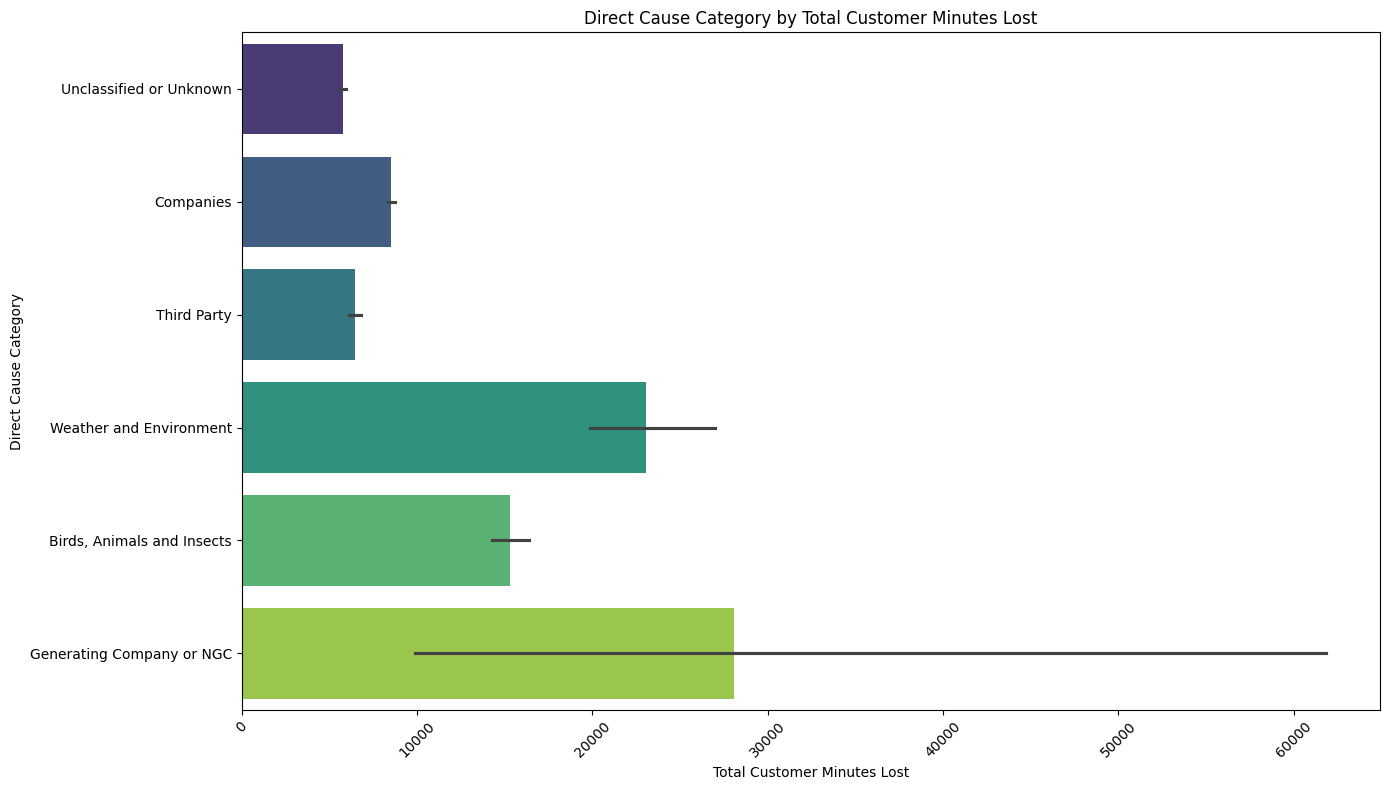

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_32995/2833925305.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outages, x='customer_affected', y='direct_cause_category', palette='viridis')


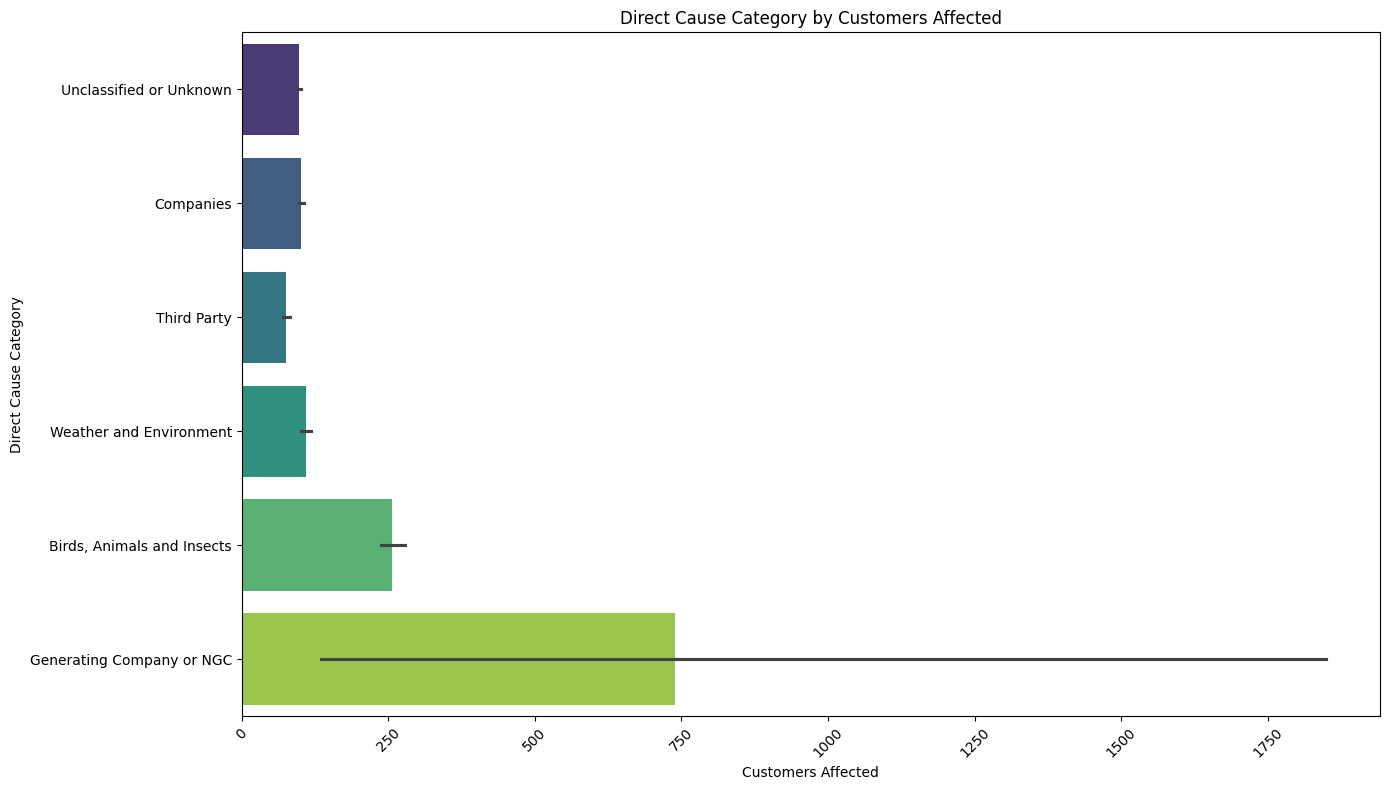

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_32995/2833925305.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outages, x='incident_duration', y='direct_cause_category', palette='viridis')


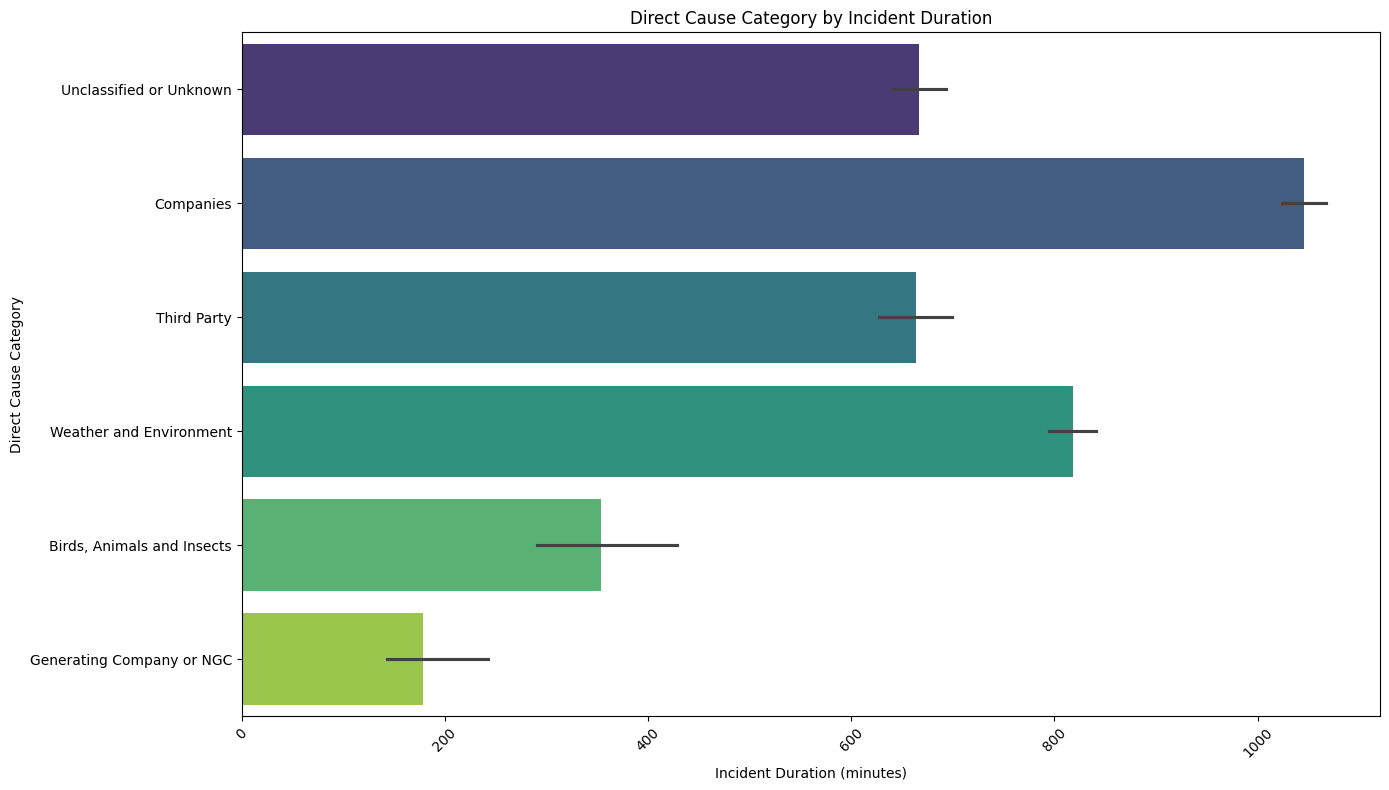

In [8]:
plt.figure(figsize=(14, 8))
sns.barplot(data=outages, x='total_customer_minutes_lost', y='direct_cause_category', palette='viridis')
plt.title('Direct Cause Category by Total Customer Minutes Lost')
plt.xlabel('Total Customer Minutes Lost')
plt.ylabel('Direct Cause Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=outages, x='customer_affected', y='direct_cause_category', palette='viridis')
plt.title('Direct Cause Category by Customers Affected')
plt.xlabel('Customers Affected')
plt.ylabel('Direct Cause Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=outages, x='incident_duration', y='direct_cause_category', palette='viridis')
plt.title('Direct Cause Category by Incident Duration')
plt.xlabel('Incident Duration (minutes)')
plt.ylabel('Direct Cause Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
weather_and_environment = outages[outages['direct_cause_category'] == 'Weather and Environment']
weather_and_environment.head()

,incident_duration,exceptional_event_id,network_type,customer_affected,direct_cause_category,direct_cause,district_name,incident_date_time,restoration_date_time,exceptional_event_enddate,exceptional_event_start_date,incident_reporting_year,main_equipment_involved_1,primary_substation,voltage,total_customer_minutes_lost,geometry
17,34828,None,HV,26.0,Weather and Environment,Flooding,Preston,2019-11-12 12:02:00+00:00,2019/12/06 16:30:00+00,None,NaT,2019,"SWITCHGEAR, FUSEGEAR AND BUSBARS",400116,11,3077,POINT (-3.00233 53.87086)
41,273,None,HV,13.0,Weather and Environment,Wind and Gale (excluding Windborne Material),Preston,2020-02-08 09:53:00+00:00,2020/02/08 14:26:00+00,None,NaT,2019,OVERHEAD LINES,400407,6.6,3549,POINT (-2.87668 53.76907)
42,325,40,HV,125.0,Weather and Environment,Wind and Gale (excluding Windborne Material),Preston,2020-02-09 20:01:00+00:00,2020/02/10 01:26:00+00,20200225105500,2020-02-08 21:50:00+00:00,2019,OVERHEAD LINES,400216,11,40625,POINT (-2.70433 53.61422)
43,277,40,HV,35.0,Weather and Environment,Wind and Gale (excluding Windborne Material),Preston,2020-02-09 21:44:00+00:00,2020/02/10 02:21:00+00,20200225105500,2020-02-08 21:50:00+00:00,2019,OVERHEAD LINES,400213,11,5783,POINT (-2.83798 53.69527)
44,417,40,HV,450.0,Weather and Environment,Wind and Gale (excluding Windborne Material),Preston,2020-02-09 10:15:00+00:00,2020/02/09 17:12:00+00,20200225105500,2020-02-08 21:50:00+00:00,2019,OVERHEAD LINES,400210,11,63365,POINT (-2.88846 53.56679)


/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_32995/1712856293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_and_environment, x='total_customer_minutes_lost', y='direct_cause', palette='viridis')


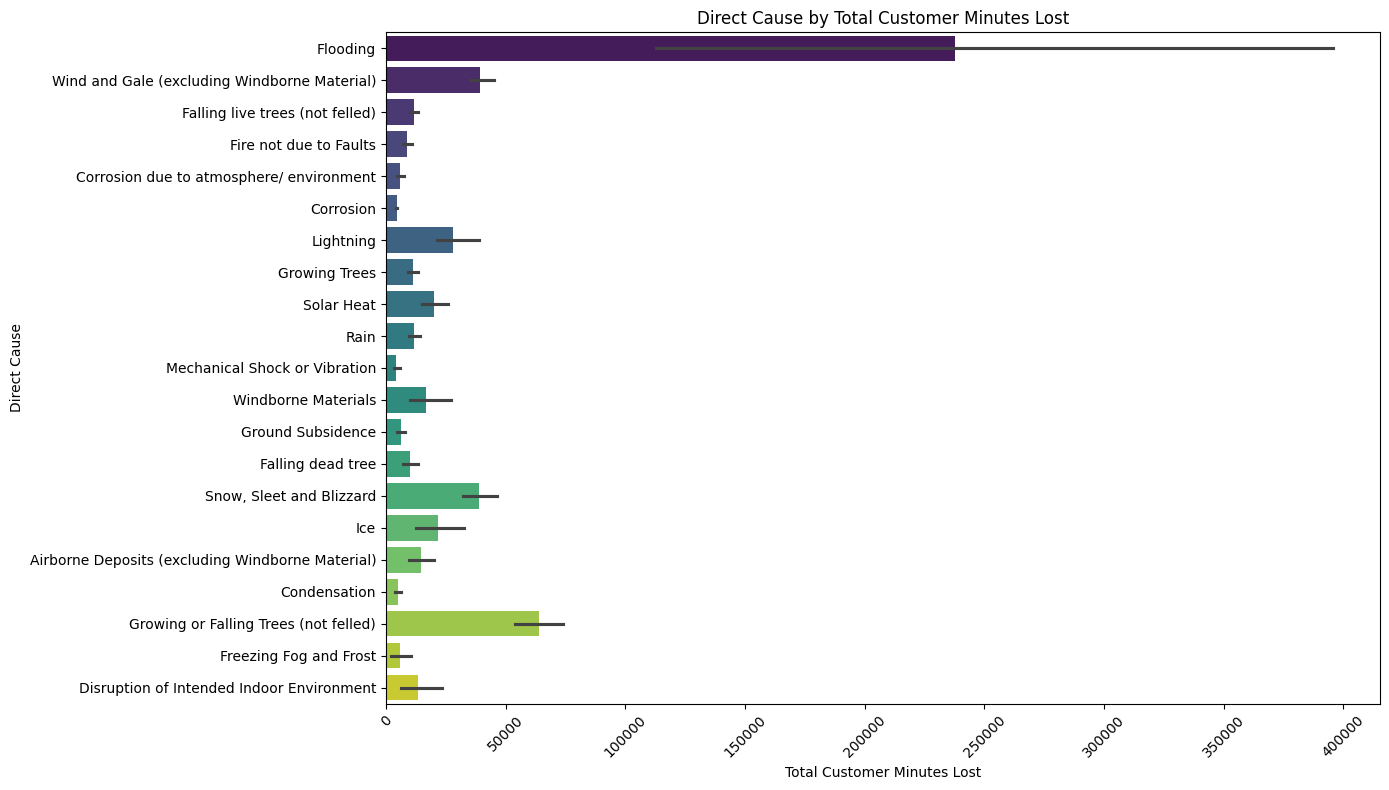

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_32995/1712856293.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_and_environment, x='customer_affected', y='direct_cause', palette='viridis')


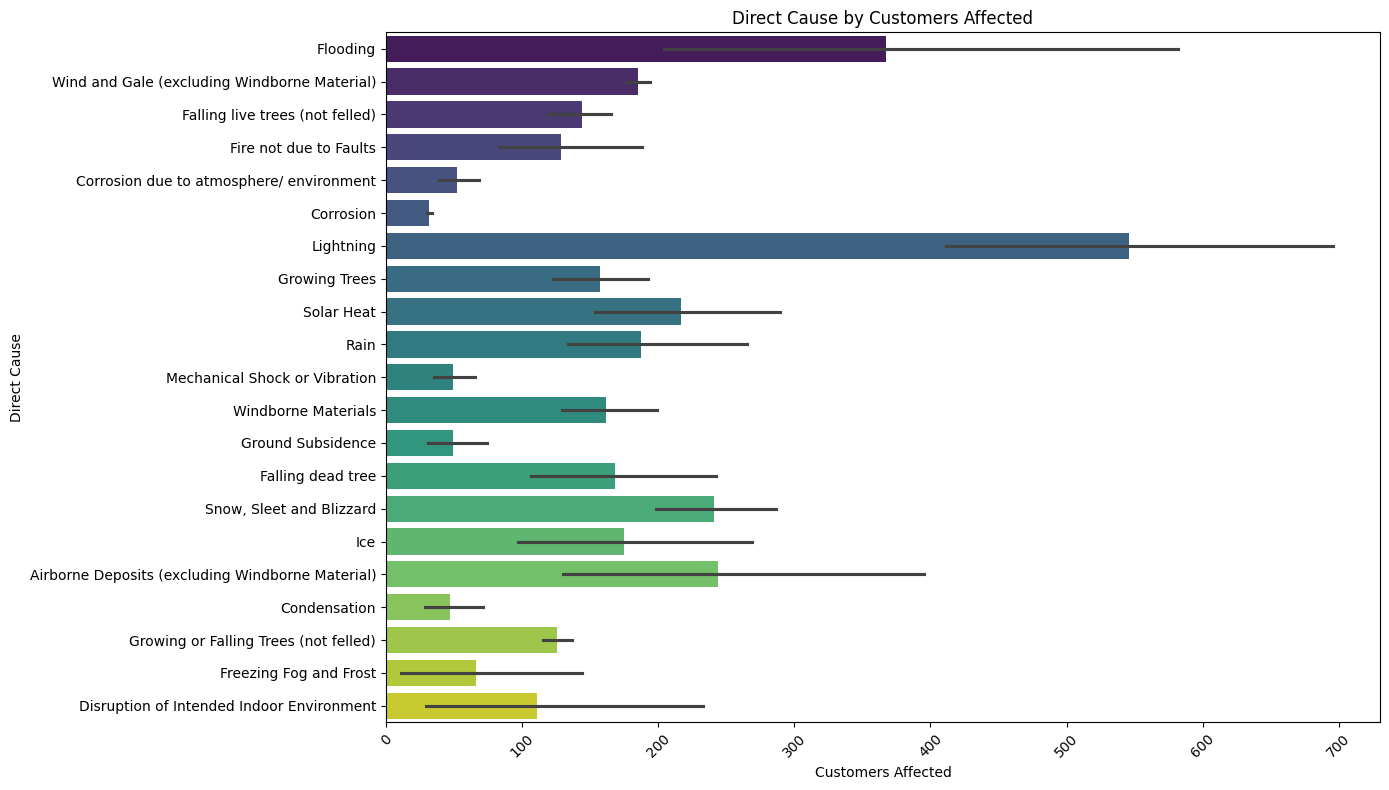

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_32995/1712856293.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_and_environment, x='incident_duration', y='direct_cause', palette='viridis')


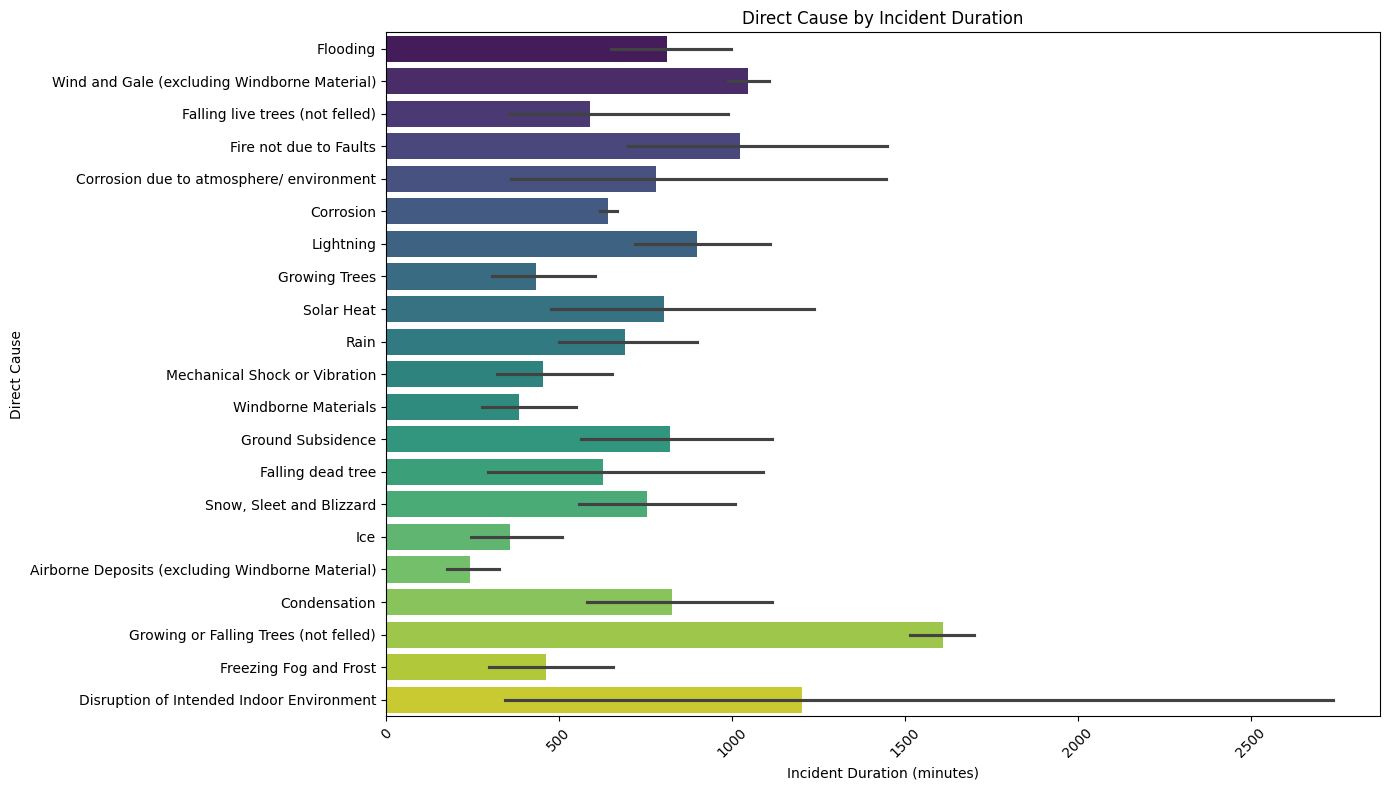

In [10]:
plt.figure(figsize=(14, 8))
sns.barplot(data=weather_and_environment, x='total_customer_minutes_lost', y='direct_cause', palette='viridis')
plt.title('Direct Cause by Total Customer Minutes Lost')
plt.xlabel('Total Customer Minutes Lost')
plt.ylabel('Direct Cause')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=weather_and_environment, x='customer_affected', y='direct_cause', palette='viridis')
plt.title('Direct Cause by Customers Affected')
plt.xlabel('Customers Affected')
plt.ylabel('Direct Cause')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=weather_and_environment, x='incident_duration', y='direct_cause', palette='viridis')
plt.title('Direct Cause by Incident Duration')
plt.xlabel('Incident Duration (minutes)')
plt.ylabel('Direct Cause')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
outages['direct_cause_category'].value_counts()

direct_cause_category
Companies                     121584
Unclassified or Unknown        94486
Weather and Environment        45568
Third Party                    29288
Birds, Animals and Insects      2830
Generating Company or NGC        398
Name: count, dtype: int64

In [12]:
flooding = outages[outages['direct_cause'] == 'Flooding']
flooding.head()

,incident_duration,exceptional_event_id,network_type,customer_affected,direct_cause_category,direct_cause,district_name,incident_date_time,restoration_date_time,exceptional_event_enddate,exceptional_event_start_date,incident_reporting_year,main_equipment_involved_1,primary_substation,voltage,total_customer_minutes_lost,geometry
17,34828,None,HV,26.0,Weather and Environment,Flooding,Preston,2019-11-12 12:02:00+00:00,2019/12/06 16:30:00+00,None,NaT,2019,"SWITCHGEAR, FUSEGEAR AND BUSBARS",400116,11,3077,POINT (-3.00233 53.87086)
110,28,40,HV,1663.0,Weather and Environment,Flooding,Blackburn,2020-02-09 15:34:00+00:00,2020/02/09 16:02:00+00,20200225105500,2020-02-08 21:50:00+00:00,2019,"SWITCHGEAR, FUSEGEAR AND BUSBARS",400071,11,46564,POINT (-2.32926 53.79468)
628,103,None,HV,2.0,Weather and Environment,Flooding,Ashton,2021-01-20 19:55:00+00:00,2021/01/21 16:00:00+00,None,NaT,2020,"SWITCHGEAR, FUSEGEAR AND BUSBARS",302963,11,103,POINT (-2.09708 53.41315)
887,472,None,HV,440.0,Weather and Environment,Flooding,Kendal,2020-08-11 04:16:00+00:00,2020/08/11 13:08:00+01,None,NaT,2020,"SWITCHGEAR, FUSEGEAR AND BUSBARS",609910,11,41605,POINT (-2.79657 54.01873)
926,16669,None,HV,89.0,Weather and Environment,Flooding,Kendal,2020-11-01 22:15:00+00:00,2020/11/13 12:04:00+00,None,NaT,2020,"POWER TRANSFORMERS, REACTORS ETC.",609958,11,21934,POINT (-2.6118 54.13908)


In [13]:
flooding.count()

incident_duration               981
exceptional_event_id            729
network_type                    981
customer_affected               981
direct_cause_category           981
direct_cause                    981
district_name                   981
incident_date_time              981
restoration_date_time           981
exceptional_event_enddate       729
exceptional_event_start_date    729
incident_reporting_year         981
main_equipment_involved_1       981
primary_substation              979
voltage                         981
total_customer_minutes_lost     981
geometry                        973
dtype: int64

In [14]:
flooding.isnull().sum()

flooding['exceptional_event_id'].fillna(0, inplace=True)

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_32995/1103655877.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flooding['exceptional_event_id'].fillna(0, inplace=True)
/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_32995/1103655877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flooding['exceptional_event_id']

In [15]:
cause_counts = flooding['main_equipment_involved_1'].value_counts()
print(cause_counts)

main_equipment_involved_1
Underground Main - PLCS (armoured or unarmoured)                                  321
MISCELLANEOUS EQUIPMENT                                                           121
SWITCHGEAR, FUSEGEAR AND BUSBARS                                                   94
Underground Main - Mixed or unclassified                                           87
Underground Main - Consac                                                          70
Switchgear/Fusegear (excl. service cut-outs)  - S/S fuseboard or pillar            67
Switchgear/Fusegear (excl. service cut-outs)  - Link-box                           38
Underground Service (metered) - PLCS                                               35
Other - Underground service cut-out (metered)                                      30
POWER TRANSFORMERS, REACTORS ETC.                                                  23
PROTECTION EQUIPMENT                                                               18
OVERHEAD LINES              

In [16]:
underground_main = flooding[flooding['main_equipment_involved_1'].isin([
    'Underground Main - PLCS (armoured or unarmoured)',
    'Underground Main - Mixed or unclassified',
    'Underground Main - Consac',
    'Underground Main - Waveform',
    'Underground Service (metered) - Plastics insulated concentric types'
])]

In [17]:
underground_main.head()

,incident_duration,exceptional_event_id,network_type,customer_affected,direct_cause_category,direct_cause,district_name,incident_date_time,restoration_date_time,exceptional_event_enddate,exceptional_event_start_date,incident_reporting_year,main_equipment_involved_1,primary_substation,voltage,total_customer_minutes_lost,geometry
11990,302,0,LV,50.0,Weather and Environment,Flooding,Carlisle,2000-09-20 13:43:00+00:00,2000/09/20 19:45:00+01,None,NaT,2000,Underground Main - PLCS (armoured or unarmoured),636397,LV,6210,POINT (-2.99096 54.84109)
15791,987,0,LV,26.0,Weather and Environment,Flooding,Stockport,2006-03-09 05:23:00+00:00,2006/03/09 21:50:00+00,None,NaT,2005,Underground Main - PLCS (armoured or unarmoured),331472,LV,20004,POINT (-2.14516 53.29354)
21168,60,0,LV,1.0,Weather and Environment,Flooding,Manchester,2024-11-14 14:30:00+00:00,2024/11/14 15:30:00+00,None,NaT,2024,Underground Service (metered) - Plastics insul...,166894,LV,60,POINT (-2.21434 53.49032)
21207,10,0,LV,5.0,Weather and Environment,Flooding,Manchester,2025-01-01 13:30:00+00:00,2025/01/03 13:30:00+00,None,NaT,2024,Underground Main - Consac,171943,LV,50,POINT (-2.24904 53.41516)
24747,56,31,LV,13.0,Weather and Environment,Flooding,Manchester,2015-12-14 18:10:00+00:00,2015/12/14 19:06:00+00,20151217185000,2015-12-04 19:20:00+00:00,2015,Underground Main - Consac,171157,LV,728,None


In [18]:
underground_main['main_equipment_involved_1'].value_counts()

main_equipment_involved_1
Underground Main - PLCS (armoured or unarmoured)                       321
Underground Main - Mixed or unclassified                                87
Underground Main - Consac                                               70
Underground Service (metered) - Plastics insulated concentric types      9
Underground Main - Waveform                                              7
Name: count, dtype: int64

In [19]:
underground_main['network_type'].value_counts()

network_type
LV    494
Name: count, dtype: int64

In [20]:
underground_main['voltage'].value_counts()

voltage
LV    494
Name: count, dtype: int64

In [21]:
underground_main = underground_main.drop(columns=['network_type', 'voltage', 'incident_reporting_year'])

In [22]:
underground_main.head()

,incident_duration,exceptional_event_id,customer_affected,direct_cause_category,direct_cause,district_name,incident_date_time,restoration_date_time,exceptional_event_enddate,exceptional_event_start_date,main_equipment_involved_1,primary_substation,total_customer_minutes_lost,geometry
11990,302,0,50.0,Weather and Environment,Flooding,Carlisle,2000-09-20 13:43:00+00:00,2000/09/20 19:45:00+01,None,NaT,Underground Main - PLCS (armoured or unarmoured),636397,6210,POINT (-2.99096 54.84109)
15791,987,0,26.0,Weather and Environment,Flooding,Stockport,2006-03-09 05:23:00+00:00,2006/03/09 21:50:00+00,None,NaT,Underground Main - PLCS (armoured or unarmoured),331472,20004,POINT (-2.14516 53.29354)
21168,60,0,1.0,Weather and Environment,Flooding,Manchester,2024-11-14 14:30:00+00:00,2024/11/14 15:30:00+00,None,NaT,Underground Service (metered) - Plastics insul...,166894,60,POINT (-2.21434 53.49032)
21207,10,0,5.0,Weather and Environment,Flooding,Manchester,2025-01-01 13:30:00+00:00,2025/01/03 13:30:00+00,None,NaT,Underground Main - Consac,171943,50,POINT (-2.24904 53.41516)
24747,56,31,13.0,Weather and Environment,Flooding,Manchester,2015-12-14 18:10:00+00:00,2015/12/14 19:06:00+00,20151217185000,2015-12-04 19:20:00+00:00,Underground Main - Consac,171157,728,None


In [23]:
underground_main['exceptional_event_id'].value_counts()

extreme_event_count = (underground_main['exceptional_event_id'] != 0).sum()
total_count = len(underground_main)
percentage_extreme_event = (extreme_event_count / total_count) * 100
print(f"Percentage of incidents during an extreme event: {percentage_extreme_event:.2f}%")

Percentage of incidents during an extreme event: 91.09%


In [24]:
underground_main.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 494 entries, 11990 to 285415
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   incident_duration             494 non-null    int32              
 1   exceptional_event_id          494 non-null    object             
 2   customer_affected             494 non-null    float64            
 3   direct_cause_category         494 non-null    object             
 4   direct_cause                  494 non-null    object             
 5   district_name                 494 non-null    object             
 6   incident_date_time            494 non-null    datetime64[ms, UTC]
 7   restoration_date_time         494 non-null    object             
 8   exceptional_event_enddate     450 non-null    object             
 9   exceptional_event_start_date  450 non-null    datetime64[ms, UTC]
 10  main_equipment_involved_1   

In [25]:
underground_main['exceptional_event_id'] = underground_main['exceptional_event_id'].astype('category')
underground_main['direct_cause_category'] = underground_main['direct_cause_category'].astype('category')
underground_main['direct_cause'] = underground_main['direct_cause'].astype('category')
underground_main['main_equipment_involved_1'] = underground_main['main_equipment_involved_1'].astype('category')
underground_main['district_name'] = underground_main['district_name'].astype('category')
underground_main['primary_substation'] = underground_main['primary_substation'].astype('category')


underground_main['restoration_date_time'] = pd.to_datetime(underground_main['restoration_date_time'], utc=True)
underground_main['exceptional_event_enddate'] = pd.to_datetime(underground_main['exceptional_event_enddate'], utc=True)

In [26]:
underground_main.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 494 entries, 11990 to 285415
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   incident_duration             494 non-null    int32              
 1   exceptional_event_id          494 non-null    category           
 2   customer_affected             494 non-null    float64            
 3   direct_cause_category         494 non-null    category           
 4   direct_cause                  494 non-null    category           
 5   district_name                 494 non-null    category           
 6   incident_date_time            494 non-null    datetime64[ms, UTC]
 7   restoration_date_time         494 non-null    datetime64[ns, UTC]
 8   exceptional_event_enddate     450 non-null    datetime64[ns, UTC]
 9   exceptional_event_start_date  450 non-null    datetime64[ms, UTC]
 10  main_equipment_involved_1   

In [27]:
underground_main.head()

,incident_duration,exceptional_event_id,customer_affected,direct_cause_category,direct_cause,district_name,incident_date_time,restoration_date_time,exceptional_event_enddate,exceptional_event_start_date,main_equipment_involved_1,primary_substation,total_customer_minutes_lost,geometry
11990,302,0,50.0,Weather and Environment,Flooding,Carlisle,2000-09-20 13:43:00+00:00,2000-09-20 18:45:00+00:00,NaT,NaT,Underground Main - PLCS (armoured or unarmoured),636397,6210,POINT (-2.99096 54.84109)
15791,987,0,26.0,Weather and Environment,Flooding,Stockport,2006-03-09 05:23:00+00:00,2006-03-09 21:50:00+00:00,NaT,NaT,Underground Main - PLCS (armoured or unarmoured),331472,20004,POINT (-2.14516 53.29354)
21168,60,0,1.0,Weather and Environment,Flooding,Manchester,2024-11-14 14:30:00+00:00,2024-11-14 15:30:00+00:00,NaT,NaT,Underground Service (metered) - Plastics insul...,166894,60,POINT (-2.21434 53.49032)
21207,10,0,5.0,Weather and Environment,Flooding,Manchester,2025-01-01 13:30:00+00:00,2025-01-03 13:30:00+00:00,NaT,NaT,Underground Main - Consac,171943,50,POINT (-2.24904 53.41516)
24747,56,31,13.0,Weather and Environment,Flooding,Manchester,2015-12-14 18:10:00+00:00,2015-12-14 19:06:00+00:00,2015-12-17 18:50:00+00:00,2015-12-04 19:20:00+00:00,Underground Main - Consac,171157,728,None


In [28]:
underground_main.to_file('../data/outages/ug-outage-flooding.geojson', driver='GeoJSON')